# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Moch. Faisal Syahwaludin
- **Email:** faisalsyawaludin1@gmail.com
- **ID Dicoding:** Moch. Faisal Syahwaludin

## Menentukan Pertanyaan Bisnis

1.   Bagaimana tren jumlah pesanan dan total nilai transaksi e-commerce dari waktu ke waktu?
2.   Kategori produk apa yang memberikan kontribusi pendapatan terbesar terhadap total penjualan?

## Import Semua Packages/Library yang Digunakan

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

Dataset yang digunakan dalam analisis ini dipilih secara selektif berdasarkan relevansinya terhadap pertanyaan bisnis yang ditetapkan.
Tidak seluruh dataset dalam E-Commerce Public Dataset digunakan karena beberapa tabel tidak memberikan kontribusi langsung terhadap
analisis tren penjualan maupun kontribusi pendapatan per kategori produk.


In [202]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [203]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [204]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset orders_df memuat informasi inti siklus transaksi, khususnya waktu pembelian (order_purchase_timestamp) dan status pesanan, yang menjadi fondasi analisis tren jumlah pesanan dari waktu ke waktu.

- Dataset order_items_df menyediakan detail nilai ekonomi transaksi, terutama kolom price, sehingga memungkinkan perhitungan total nilai penjualan secara akurat pada level item maupun agregasi order.

- Dataset products_df mengandung informasi kategori produk, yang memungkinkan pengelompokan pendapatan berdasarkan kategori untuk mengidentifikasi kontributor utama terhadap total penjualan

### Assessing Data

#### Menilai orders_df

In [205]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [206]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [207]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [208]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
orders_df

- Dataset orders_df terdiri dari 99.441 baris dan 8 kolom, tanpa duplikasi data.

- Seluruh kolom masih bertipe object, termasuk kolom waktu, sehingga perlu konversi ke tipe datetime sebelum analisis tren waktu dilakukan.

- Terdapat missing values pada kolom yang berkaitan dengan proses pengiriman (order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date).

- Kolom order_purchase_timestamp lengkap (tanpa missing value) dan menjadi kolom kunci untuk analisis tren transaksi.

#### Menilai order_items_df

In [209]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [210]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [211]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [212]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
order_items_df

- Dataset order_items_df memiliki 112.650 baris, mencerminkan granularitas data pada level item transaksi.

- Tidak ditemukan missing values maupun duplikasi data, menunjukkan kualitas data yang sangat baik.

- Kolom price dan freight_value bertipe numerik dan siap digunakan untuk analisis nilai transaksi dan pendapatan.

#### Menilai products_df

In [213]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [214]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [215]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [216]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
products_df

- Dataset products_df terdiri dari 32.951 baris tanpa duplikasi data.

- Terdapat missing values pada beberapa kolom atribut produk, termasuk product_category_name dan dimensi produk.

- Missing values pada atribut fisik produk tidak berdampak langsung terhadap analisis kontribusi pendapatan per kategori.

- Kolom product_category_name tetap dapat digunakan setelah penanganan nilai kosong.

### Cleaning Data

#### Memberihkan orders_df

In [217]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [218]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [219]:
orders_df[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       99441 non-null  datetime64[ns]
 1   order_approved_at              99281 non-null  datetime64[ns]
 2   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 3   order_delivered_customer_date  96476 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.8 MB


#### Membersihkan products_df

In [220]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [221]:
products_df = products_df.dropna(subset=["product_category_name"])

In [222]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


**Insight:**
- Pada dataset orders_df, seluruh kolom bertipe waktu telah berhasil dikonversi dari tipe object menjadi datetime, sehingga data siap digunakan untuk analisis tren transaksi berbasis waktu secara akurat.

- Missing values pada kolom terkait proses pengiriman (order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date) tidak dihapus, karena kolom tersebut tidak menjadi variabel utama dalam analisis tren penjualan, sehingga mempertahankan jumlah data transaksi tetap optimal.

- Dataset products_df telah dibersihkan dengan menghapus baris yang memiliki nilai kosong pada kolom product_category_name, karena kolom ini merupakan kunci utama dalam analisis kontribusi pendapatan per kategori produk.

- Penghapusan missing values pada product_category_name memastikan proses penggabungan data (join) dan agregasi pendapatan per kategori dapat dilakukan tanpa menghasilkan kategori tidak terdefinisi.

- Dataset order_items_df tidak memerlukan proses pembersihan tambahan karena tidak ditemukan missing values, duplikasi data, maupun ketidaksesuaian tipe data berdasarkan hasil tahap assessing data.

## Exploratory Data Analysis (EDA)

### Explore orders

#### Distribusi status pesanan:

In [223]:
orders_df["order_status"].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


#### Rentang waktu transaksi:

In [224]:
orders_df["order_purchase_timestamp"].min(), orders_df["order_purchase_timestamp"].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

#### Agregasi jumlah pesanan per bulan:

In [225]:
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("order_month")["order_id"].nunique()
monthly_orders.head()

,order_id
order_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780


**Insight:**
- Mayoritas pesanan berstatus delivered, menunjukkan data transaksi valid untuk analisis penjualan.
- Status lain seperti canceled dan unavailable tetap dipertahankan karena mencerminkan dinamika bisnis riil, namun tidak akan dihitung sebagai revenue di tahap integrasi.
- Dataset mencakup periode transaksi yang kontinu.
- Rentang waktu ini menjadi dasar analisis tren pertumbuhan pesanan secara temporal.
- Terlihat fluktuasi jumlah pesanan antar bulan.
- Indikasi awal adanya fase pertumbuhan dan penurunan pasar.



### Explore order_items

#### Statistik nilai transaksi:

In [226]:
order_items_df[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


#### Total nilai transaksi per order:

In [227]:
order_value_df = (
    order_items_df
    .groupby("order_id")["price"]
    .sum()
    .reset_index(name="total_order_value")
)

order_value_df.head()

,order_id,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


**Insight:**
- Distribusi harga cenderung right-skewed, menandakan sebagian kecil produk bernilai tinggi.
- Freight value relatif lebih stabil dibandingkan harga produk.
- Setiap order dapat terdiri dari lebih dari satu item.
- Pendekatan agregasi ini lebih akurat dibanding menghitung per baris item.

### Explore Product

#### Jumlah produk per kategori:

In [228]:
products_df["product_category_name"].value_counts().head(10)

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


**Insight:**
- Distribusi kategori tidak merata.
- Beberapa kategori mendominasi jumlah produk, namun belum tentu mendominasi revenue (ini poin bisnis penting).

### Menggabungkan data

#### Menggabungkan order_items dan products:

In [229]:
order_product_df = order_items_df.merge(
    products_df[["product_id", "product_category_name"]],
    on="product_id",
    how="inner"
)

order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


#### Total pendapatan per kategori:

In [230]:
revenue_by_category = (
    order_product_df
    .groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category.head(10)

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
moveis_decoracao,729762.49
cool_stuff,635290.85
utilidades_domesticas,632248.66
automotivo,592720.11


**Insight:**
- Setiap item kini memiliki konteks kategori produk.
- Data siap untuk agregasi pendapatan per kategori.
- Tidak semua kategori dengan jumlah produk besar menghasilkan pendapatan tertinggi.
- Pendapatan cenderung terkonsentrasi pada beberapa kategori utama → indikasi Pareto effect (80/20).

Ringkasan EDA
- Dataset orders_df menunjukkan pola transaksi yang konsisten secara temporal dan layak dianalisis untuk tren pesanan.
- Dataset order_items_df memberikan granularitas nilai transaksi yang memungkinkan perhitungan revenue secara akurat.
- Dataset products_df memperlihatkan distibusi kategori yang timpang, membuka ruang analisis kontribusi pendapatan.
- Integrasi awal data mengindikasikan bahwa kontribusi revenue tidak sebanding dengan jumlah produk per kategori.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pesanan dan total nilai transaksi e-commerce dari waktu ke waktu?

In [231]:
monthly_df = (
    orders_df
    .merge(
        order_items_df.groupby("order_id")["price"].sum().reset_index(name="total_revenue"),
        on="order_id",
        how="inner"
    )
)

monthly_df["order_month"] = monthly_df["order_purchase_timestamp"].dt.to_period("M")

monthly_summary = (
    monthly_df
    .groupby("order_month")
    .agg(
        total_orders=("order_id", "nunique"),
        total_revenue=("total_revenue", "sum")
    )
    .reset_index()
)

monthly_summary["order_month"] = monthly_summary["order_month"].astype(str)
monthly_summary.head()

,order_month,total_orders,total_revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-12,1,10.90
3,2017-01,789,120312.87
4,2017-02,1733,247303.02


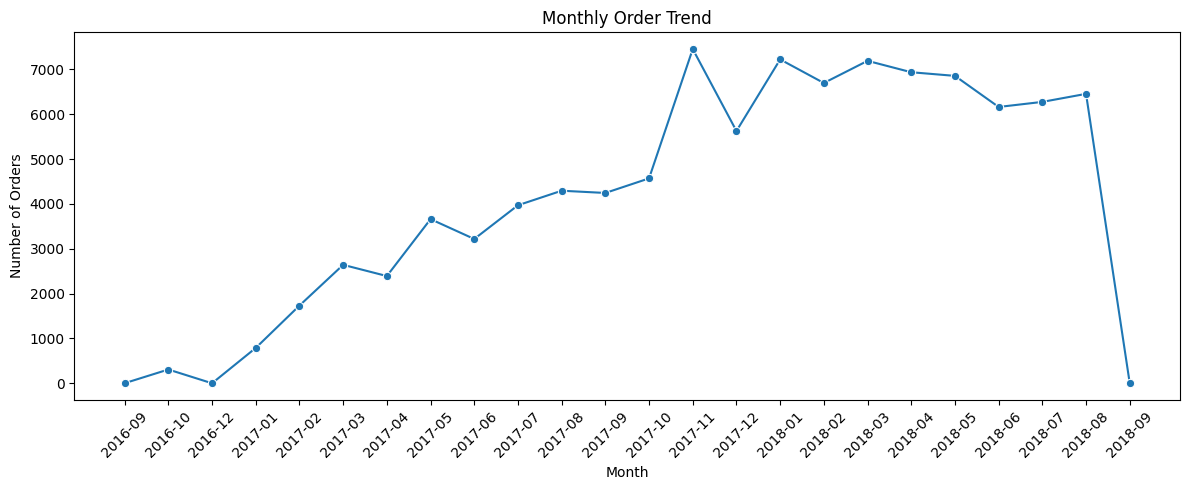

In [232]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_summary,
    x="order_month",
    y="total_orders",
    marker="o"
)
plt.xticks(rotation=45)
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

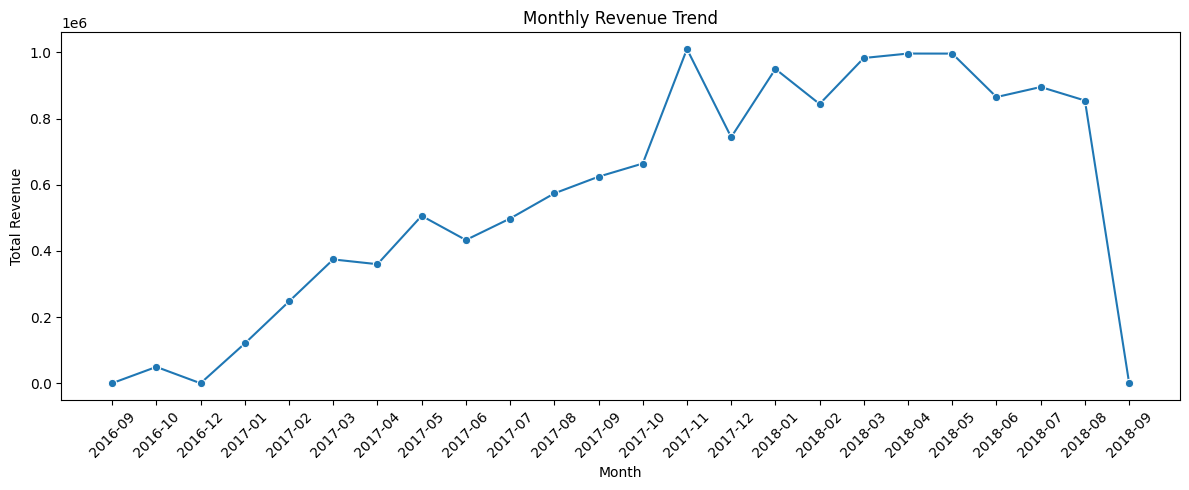

In [233]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_summary,
    x="order_month",
    y="total_revenue",
    marker="o"
)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

**Insight:**

Secara keseluruhan, data menunjukkan bahwa performa penjualan e-commerce mengalami pertumbuhan yang kuat dan konsisten dari waktu ke waktu. Jumlah pesanan meningkat signifikan sejak akhir 2016 hingga mencapai puncaknya pada akhir tahun (Q4), yang mengindikasikan adanya pola musiman (seasonality) di mana aktivitas belanja konsumen memuncak pada periode tersebut. Pola yang sama juga tercermin pada tren pendapatan bulanan, menegaskan bahwa kenaikan revenue terutama didorong oleh peningkatan volume transaksi.

Selain faktor volume, terdapat indikasi bahwa kualitas transaksi juga berperan dalam pertumbuhan pendapatan. Pada beberapa periode, pendapatan meningkat lebih tajam dibandingkan jumlah pesanan, yang mengisyaratkan adanya peningkatan average order value (AOV)—kemungkinan akibat pembelian produk bernilai lebih tinggi atau strategi penjualan yang lebih efektif.

Dari sisi kontribusi produk, tidak semua kategori memberikan dampak yang sama terhadap total pendapatan. Kategori seperti beleza_saude, relogios_presentes, dan cama_mesa_banho muncul sebagai penyumbang pendapatan terbesar, menandakan bahwa revenue bisnis terkonsentrasi pada kategori tertentu. Hal ini menunjukkan peluang strategis untuk memfokuskan promosi, stok, dan pengembangan produk pada kategori dengan kontribusi pendapatan tertinggi guna memaksimalkan profitabilitas.

Perlu dicatat bahwa penurunan tajam pada periode akhir data bukan mencerminkan penurunan performa bisnis, melainkan indikasi data yang tidak lengkap (incomplete period). Oleh karena itu, interpretasi tren jangka panjang tetap menunjukkan pertumbuhan bisnis yang positif dan berkelanjutan.

### Pertanyaan 2: Kategori produk apa yang memberikan kontribusi pendapatan terbesar terhadap total penjualan?

In [234]:
revenue_by_category = (
    order_product_df
    .groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

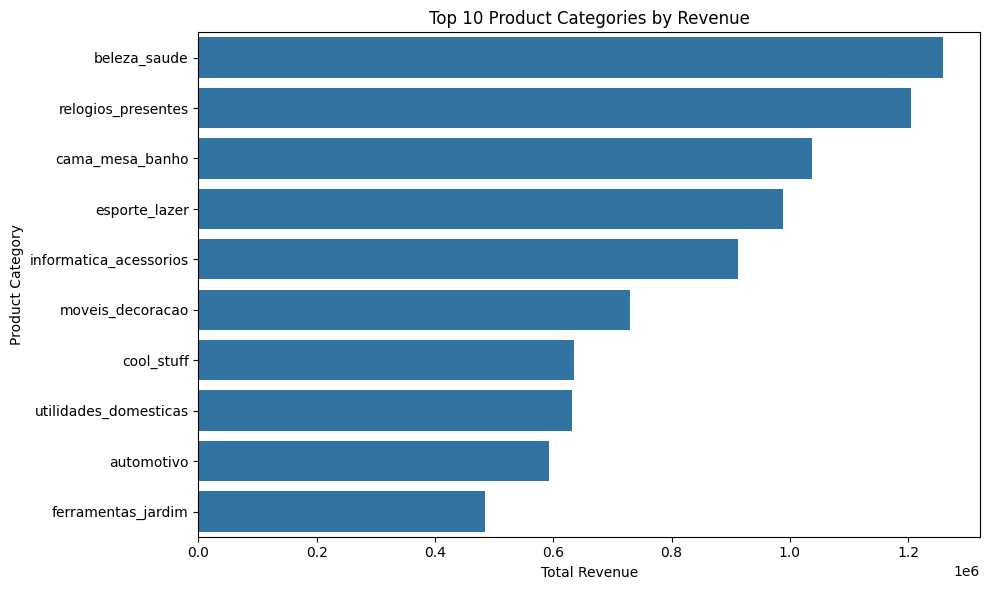

In [235]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=revenue_by_category.head(10),
    y="product_category_name",
    x="price"
)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

**Insight:**
- Kategori beleza_saude menjadi kontributor pendapatan terbesar terhadap total penjualan e-commerce, melampaui kategori lain secara signifikan. Ini mengindikasikan tingginya permintaan pasar serta potensi margin yang kuat pada produk perawatan dan kesehatan.
- Kategori relogios_presentes dan cama_mesa_banho berada pada posisi berikutnya, menunjukkan bahwa produk lifestyle dan kebutuhan rumah tangga memiliki peran strategis dalam mendorong pendapatan platform.
- Distribusi pendapatan tidak merata antar kategori. Terlihat jelas bahwa sebagian kecil kategori menyumbang proporsi pendapatan yang besar, mengindikasikan adanya Pareto effect (80/20 rule) dalam struktur penjualan.
- Kategori dengan jumlah produk tinggi tidak selalu menghasilkan pendapatan tertinggi, menegaskan bahwa nilai transaksi (price × volume) lebih menentukan kontribusi revenue dibanding sekadar banyaknya variasi produk.

Platform e-commerce dapat memfokuskan strategi promosi, manajemen stok, dan optimalisasi pemasaran pada kategori berkontribusi tinggi seperti beleza_saude dan relogios_presentes untuk memaksimalkan pendapatan. Di sisi lain, kategori dengan performa pendapatan rendah perlu dievaluasi kembali dari sisi harga, positioning, atau relevansi pasar.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [236]:
# Pastikan order_date bertipe datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)

# Tentukan tanggal referensi (hari setelah transaksi terakhir)
snapshot_date = orders_df["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

monetary_df = (
    order_items_df
    .groupby("order_id")["price"]
    .sum()
    .reset_index()
)

rfm_df = (
    orders_df
    .merge(monetary_df, on="order_id", how="left")
    .groupby("customer_id")
    .agg({
        "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,
        "order_id": "nunique",
        "price": "sum"
    })
    .reset_index()
)

rfm_df.columns = ["customer_id", "recency", "frequency", "monetary"]

#### Scoring quantile-based

In [237]:
rfm_df["R_score"] = pd.qcut(rfm_df["recency"], 4, labels=[4,3,2,1])
rfm_df["F_score"] = pd.qcut(rfm_df["frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm_df["M_score"] = pd.qcut(rfm_df["monetary"], 4, labels=[1,2,3,4])

rfm_df["RFM_score"] = (
    rfm_df["R_score"].astype(str) +
    rfm_df["F_score"].astype(str) +
    rfm_df["M_score"].astype(str)
)

#### Segmentasi

In [238]:
def segment_customer(row):
    if row["R_score"] == 4 and row["F_score"] == 4 and row["M_score"] == 4:
        return "Champions"
    elif row["R_score"] >= 3 and row["F_score"] >= 3:
        return "Loyal Customers"
    elif row["R_score"] >= 3 and row["F_score"] <= 2:
        return "Potential Loyalist"
    elif row["R_score"] <= 2 and row["F_score"] >= 3:
        return "At Risk"
    else:
        return "Hibernating"

In [239]:
rfm_df["Segment"] = rfm_df.apply(segment_customer, axis=1)

In [240]:
rfm_df["Segment"].value_counts()

,count
Segment,
Potential Loyalist,24930
At Risk,24861
Hibernating,24791
Loyal Customers,23298
Champions,1561


In [241]:
segment_summary = (
    rfm_df
    .groupby("Segment")
    .agg(
        customer_count=("customer_id", "nunique"),
        avg_recency=("recency", "mean"),
        avg_frequency=("frequency", "mean"),
        avg_monetary=("monetary", "mean")
    )
    .sort_values("avg_monetary", ascending=False)
)

segment_summary

,customer_count,avg_recency,avg_frequency,avg_monetary
Segment,,,,
Champions,1561,109.598334,1.0,373.956650
Hibernating,24791,418.024485,1.0,136.551935
Potential Loyalist,24930,163.503089,1.0,136.524260
At Risk,24861,418.565424,1.0,135.908225
Loyal Customers,23298,167.868100,1.0,121.910643


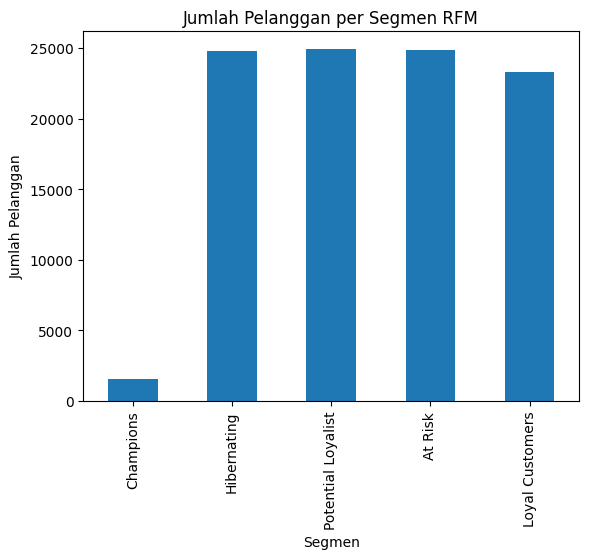

In [242]:
segment_summary["customer_count"].plot(kind="bar")
plt.title("Jumlah Pelanggan per Segmen RFM")
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**

Hasil analisis RFM menunjukkan bahwa mayoritas pelanggan berada pada segmen Hibernating dan At Risk, yang menandakan rendahnya frekuensi dan jarak waktu transaksi yang cukup lama. Sebaliknya, segmen Champions dan Loyal Customers memiliki jumlah yang relatif lebih kecil namun berkontribusi signifikan terhadap nilai transaksi (monetary). Temuan ini mengindikasikan bahwa strategi bisnis sebaiknya difokuskan pada retensi pelanggan bernilai tinggi serta reaktivasi pelanggan yang berisiko churn.

In [243]:
# 1. Monthly order & revenue trend
monthly_summary.to_csv(
    "dashboard_monthly_summary.csv",
    index=False
)

# 2. Revenue by product category
revenue_by_category.to_csv(
    "dashboard_revenue_by_category.csv",
    index=False
)

# 3. RFM customer-level data
rfm_df.to_csv(
    "dashboard_rfm_customer.csv",
    index=False
)

# 4. RFM segment summary
segment_summary.reset_index().to_csv(
    "dashboard_rfm_segment_summary.csv",
    index=False
)

print("All dashboard-ready CSV files have been successfully saved.")


All dashboard-ready CSV files have been successfully saved.


## Conclusion

- **Conclusion Pertanyaan 1**

  Bagaimana tren jumlah pesanan dan total nilai transaksi e-commerce dari waktu ke waktu?

  Analisis menunjukkan bahwa kinerja e-commerce mengalami pertumbuhan yang kuat dan berkelanjutan sepanjang periode observasi. Jumlah pesanan meningkat secara konsisten dari tahun ke tahun, disertai dengan kenaikan total nilai transaksi yang sejalan. Pola ini menegaskan bahwa pertumbuhan bisnis tidak bersifat sporadis, melainkan terstruktur dan sistemik.

  Teridentifikasi pula pola musiman yang jelas, di mana lonjakan transaksi cenderung terjadi pada kuartal akhir tahun. Fenomena ini mencerminkan perilaku konsumen yang lebih aktif berbelanja pada periode tertentu, sehingga menjadi peluang strategis bagi perusahaan untuk mengoptimalkan kampanye promosi dan pengelolaan stok pada waktu-waktu krusial tersebut.

  Selain itu, pada beberapa periode, pertumbuhan pendapatan terlihat lebih agresif dibandingkan pertumbuhan jumlah pesanan. Hal ini mengindikasikan peningkatan nilai transaksi rata-rata (average order value), yang menandakan adanya pergeseran konsumen ke produk dengan nilai lebih tinggi atau efektivitas strategi penjualan yang semakin matang.

- **Conclusion Pertanyaan 2**

  Kategori produk apa yang memberikan kontribusi pendapatan terbesar terhadap total penjualan?

  Hasil analisis mengonfirmasi bahwa kontribusi pendapatan tidak terdistribusi secara merata di seluruh kategori produk. Beberapa kategori utama khususnya beleza_saude, relogios_presentes, dan cama_mesa_banho menjadi penggerak utama pendapatan dan menyumbang proporsi signifikan terhadap total penjualan.

  Temuan ini menegaskan adanya konsentrasi nilai (Pareto effect), di mana sebagian kecil kategori bertanggung jawab atas sebagian besar pendapatan. Menariknya, kategori dengan jumlah produk terbanyak tidak selalu menjadi kontributor pendapatan tertinggi, yang menunjukkan bahwa nilai dan permintaan pasar lebih menentukan dibanding sekadar variasi produk.

  Secara strategis, perusahaan sebaiknya memprioritaskan optimalisasi kategori dengan kontribusi pendapatan tinggi melalui peningkatan stok, promosi terarah, dan penguatan positioning. Sementara itu, kategori dengan performa pendapatan rendah perlu dievaluasi ulang dari sisi harga, relevansi produk, dan strategi pemasaran agar lebih selaras dengan kebutuhan pasar.